In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import bz2 # for pickling and unplicking large files

In [48]:
main_directory = '/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/'
with open(main_directory+'total_unified_results_v2.pickle', 'rb') as f:
    total_results = pickle.load(f)

In [11]:
total_results={}

In [12]:
for directory in os.listdir(main_directory):
    if '.pickle' in directory or '.csv' in directory or 'censored' not in directory:
        continue
    print(directory)
    with open(main_directory+directory+'_unified_results.pickle','rb') as f:
        total_results[directory] = pickle.load(f)

censored_Jnk
censored_Ikk2
censored_LEF1
censored_IRF4
censored_MYC
censored_Erk
censored_CTNNB1


In [49]:
df = pd.DataFrame(columns=["Número de nodos", "Media Geométrica", "Método de Selección de Atributos","Clasificador", "Origen"])
for key in total_results:
    for f_key in total_results[key]:
        if 'AGA' not in f_key:
            for c_key in total_results[key][f_key]:
                for t_key in total_results[key][f_key][c_key]:
                    df = df.append({
                        "Número de nodos":int(t_key.split('top')[1]), 
                        "Media Geométrica":total_results[key][f_key][c_key][t_key],
                        "Método de Selección de Atributos":f_key,
                        "Clasificador":c_key,
                        "Origen":key
                    }, ignore_index=True)

/home/a20114261/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


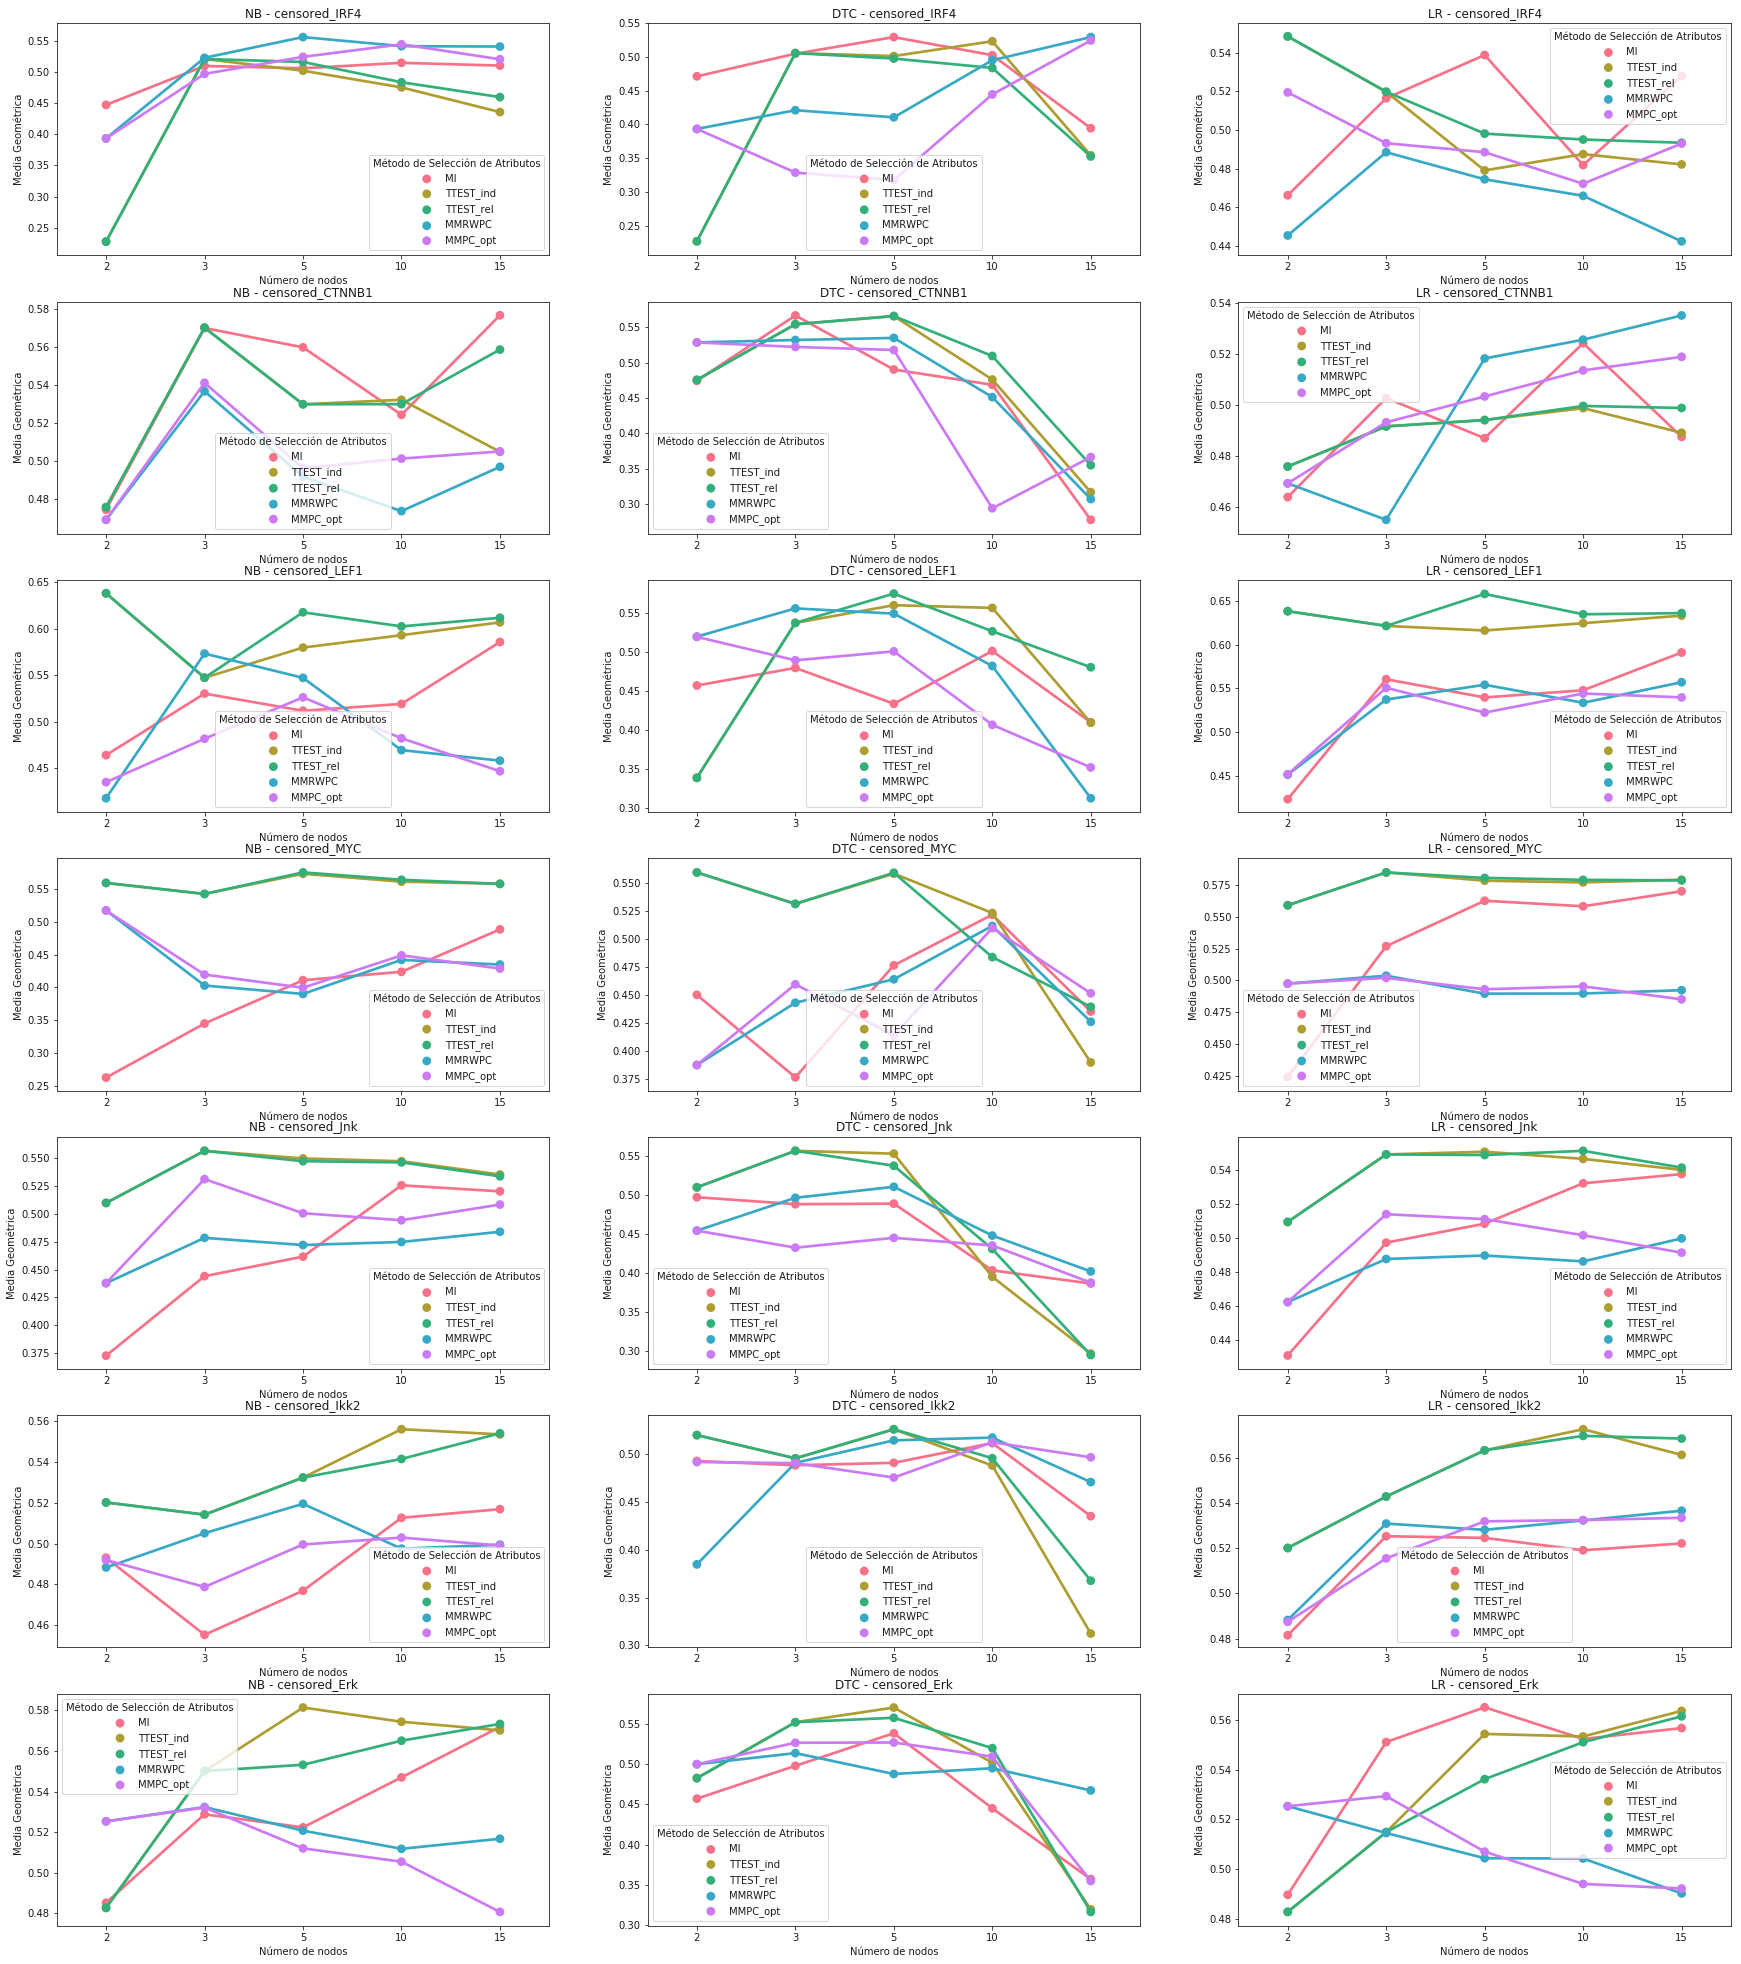

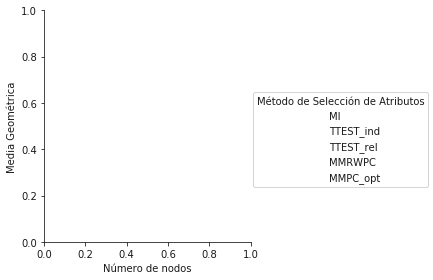

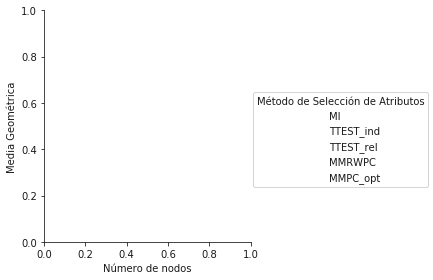

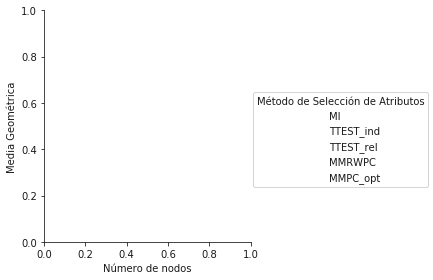

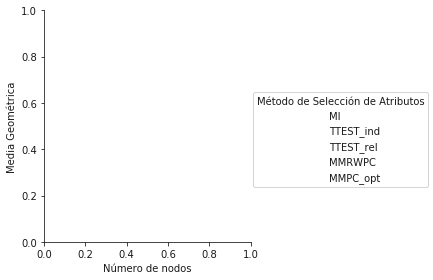

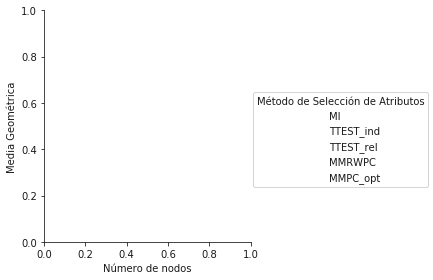

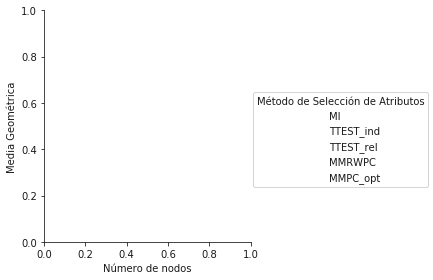

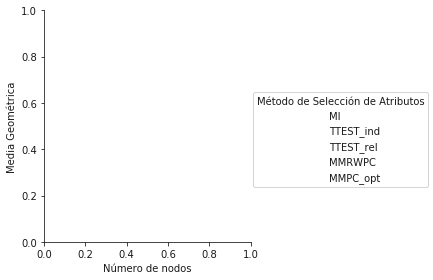

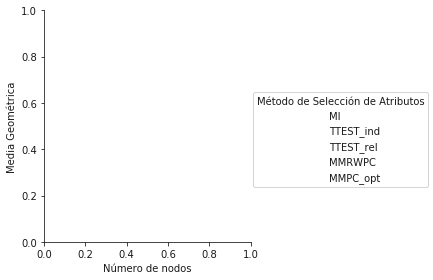

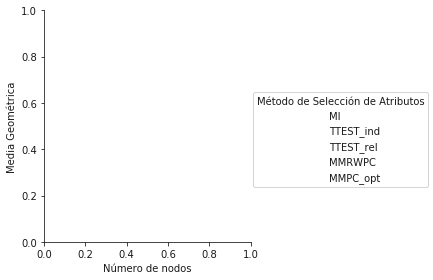

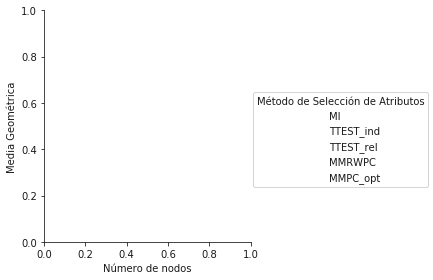

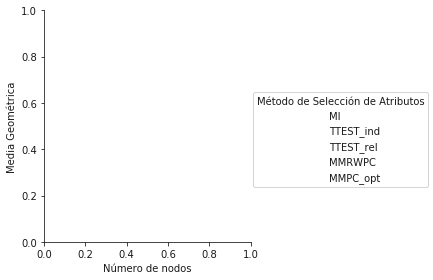

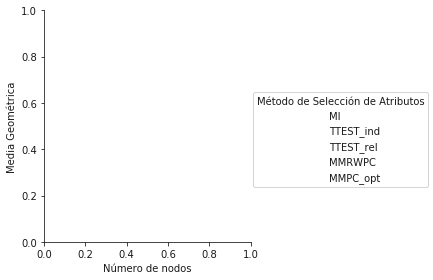

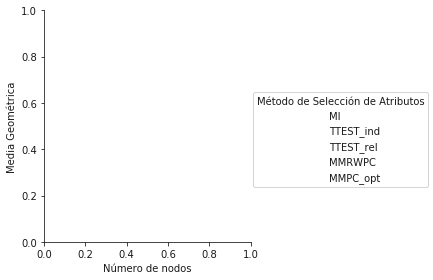

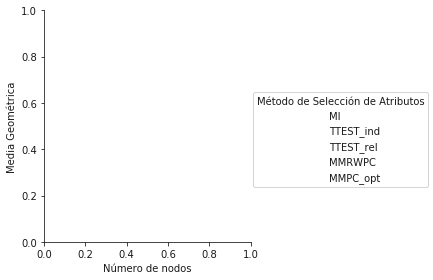

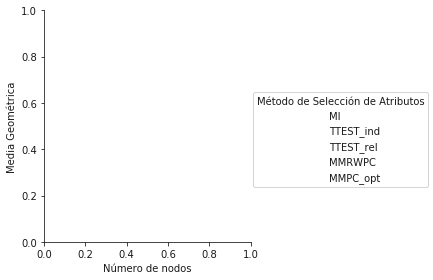

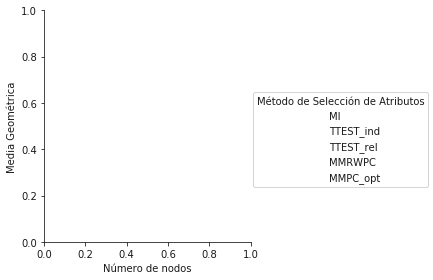

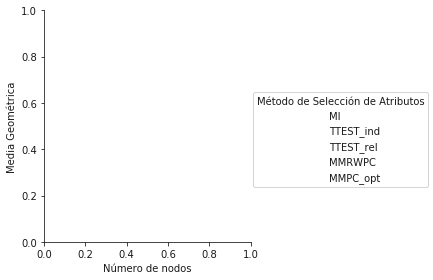

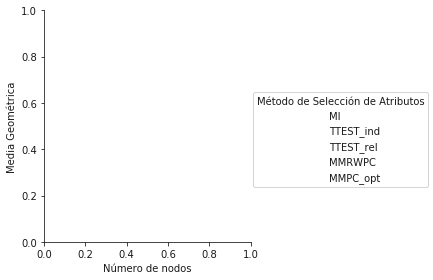

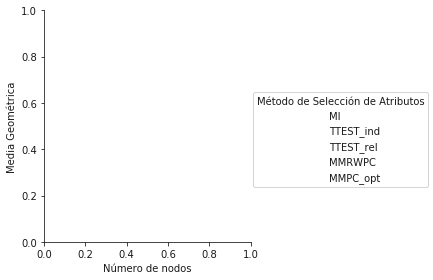

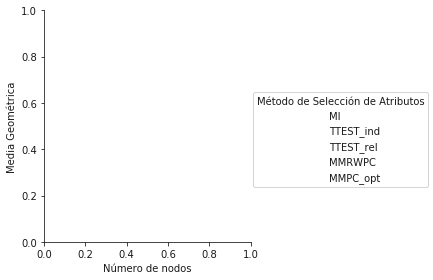

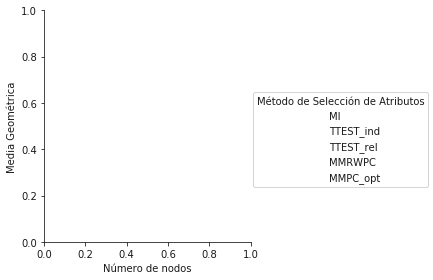

In [50]:
classificator_list = list(set(df["Clasificador"]))
origin_list = list(set(df["Origen"]))

#f, axes = plt.subplots(len(classificator_list), len(origin_list))
f, axes = plt.subplots(len(origin_list),len(classificator_list), figsize=(30,35))
for i in range(0,len(classificator_list)):
    for j in range(0,len(origin_list)):        
        # Draw a pointplot to show pulse as a function of three categorical factors
        sns.set_color_codes("pastel")
        #g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
        g = sns.factorplot(x="Número de nodos",y="Media Geométrica",hue='Método de Selección de Atributos', 
                           data=df.query('Clasificador == "'+classificator_list[i]+'" and Origen=="'+origin_list[j]+'"'), palette="husl", 
                            alpha=0.5, ax=axes[j,i])
        # g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
        # g.map(plt.scatter, "Node name", "Distance", alpha=.5)
        #g.set_yticklabels(np.arange(0,2,0.15))
        #g.set_xticklabels(rotation=90)
        #g.add_legend()
        axes[j,i].title.set_text(classificator_list[i]+" - "+origin_list[j])

In [25]:
aga_df = pd.DataFrame(columns=["Fracción Mínima de Aparación", "GMedia", "Clasificador", "Método de Selección de Atributos","Origen"])
for key in total_results:
    for f_key in total_results[key]:
        if 'AGA' in f_key:
            #print(total_results[key][f_key])
            for fr_key in total_results[key][f_key]:
                for c_key in total_results[key][f_key][fr_key]:
                    m_key = 'MMPCOPT'
                    if 'OPT' not in f_key:
                        m_key = 'MMRWPC'
                    aga_df = aga_df.append({
                        "Fracción Mínima de Aparación":float(fr_key), 
                        "GMedia":total_results[key][f_key][fr_key][c_key]['unique'],                        
                        "Clasificador":c_key,
                        "Método de Selección de Atributos": m_key,
                        "Origen":key
                    }, ignore_index=True)

/home/a20114261/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


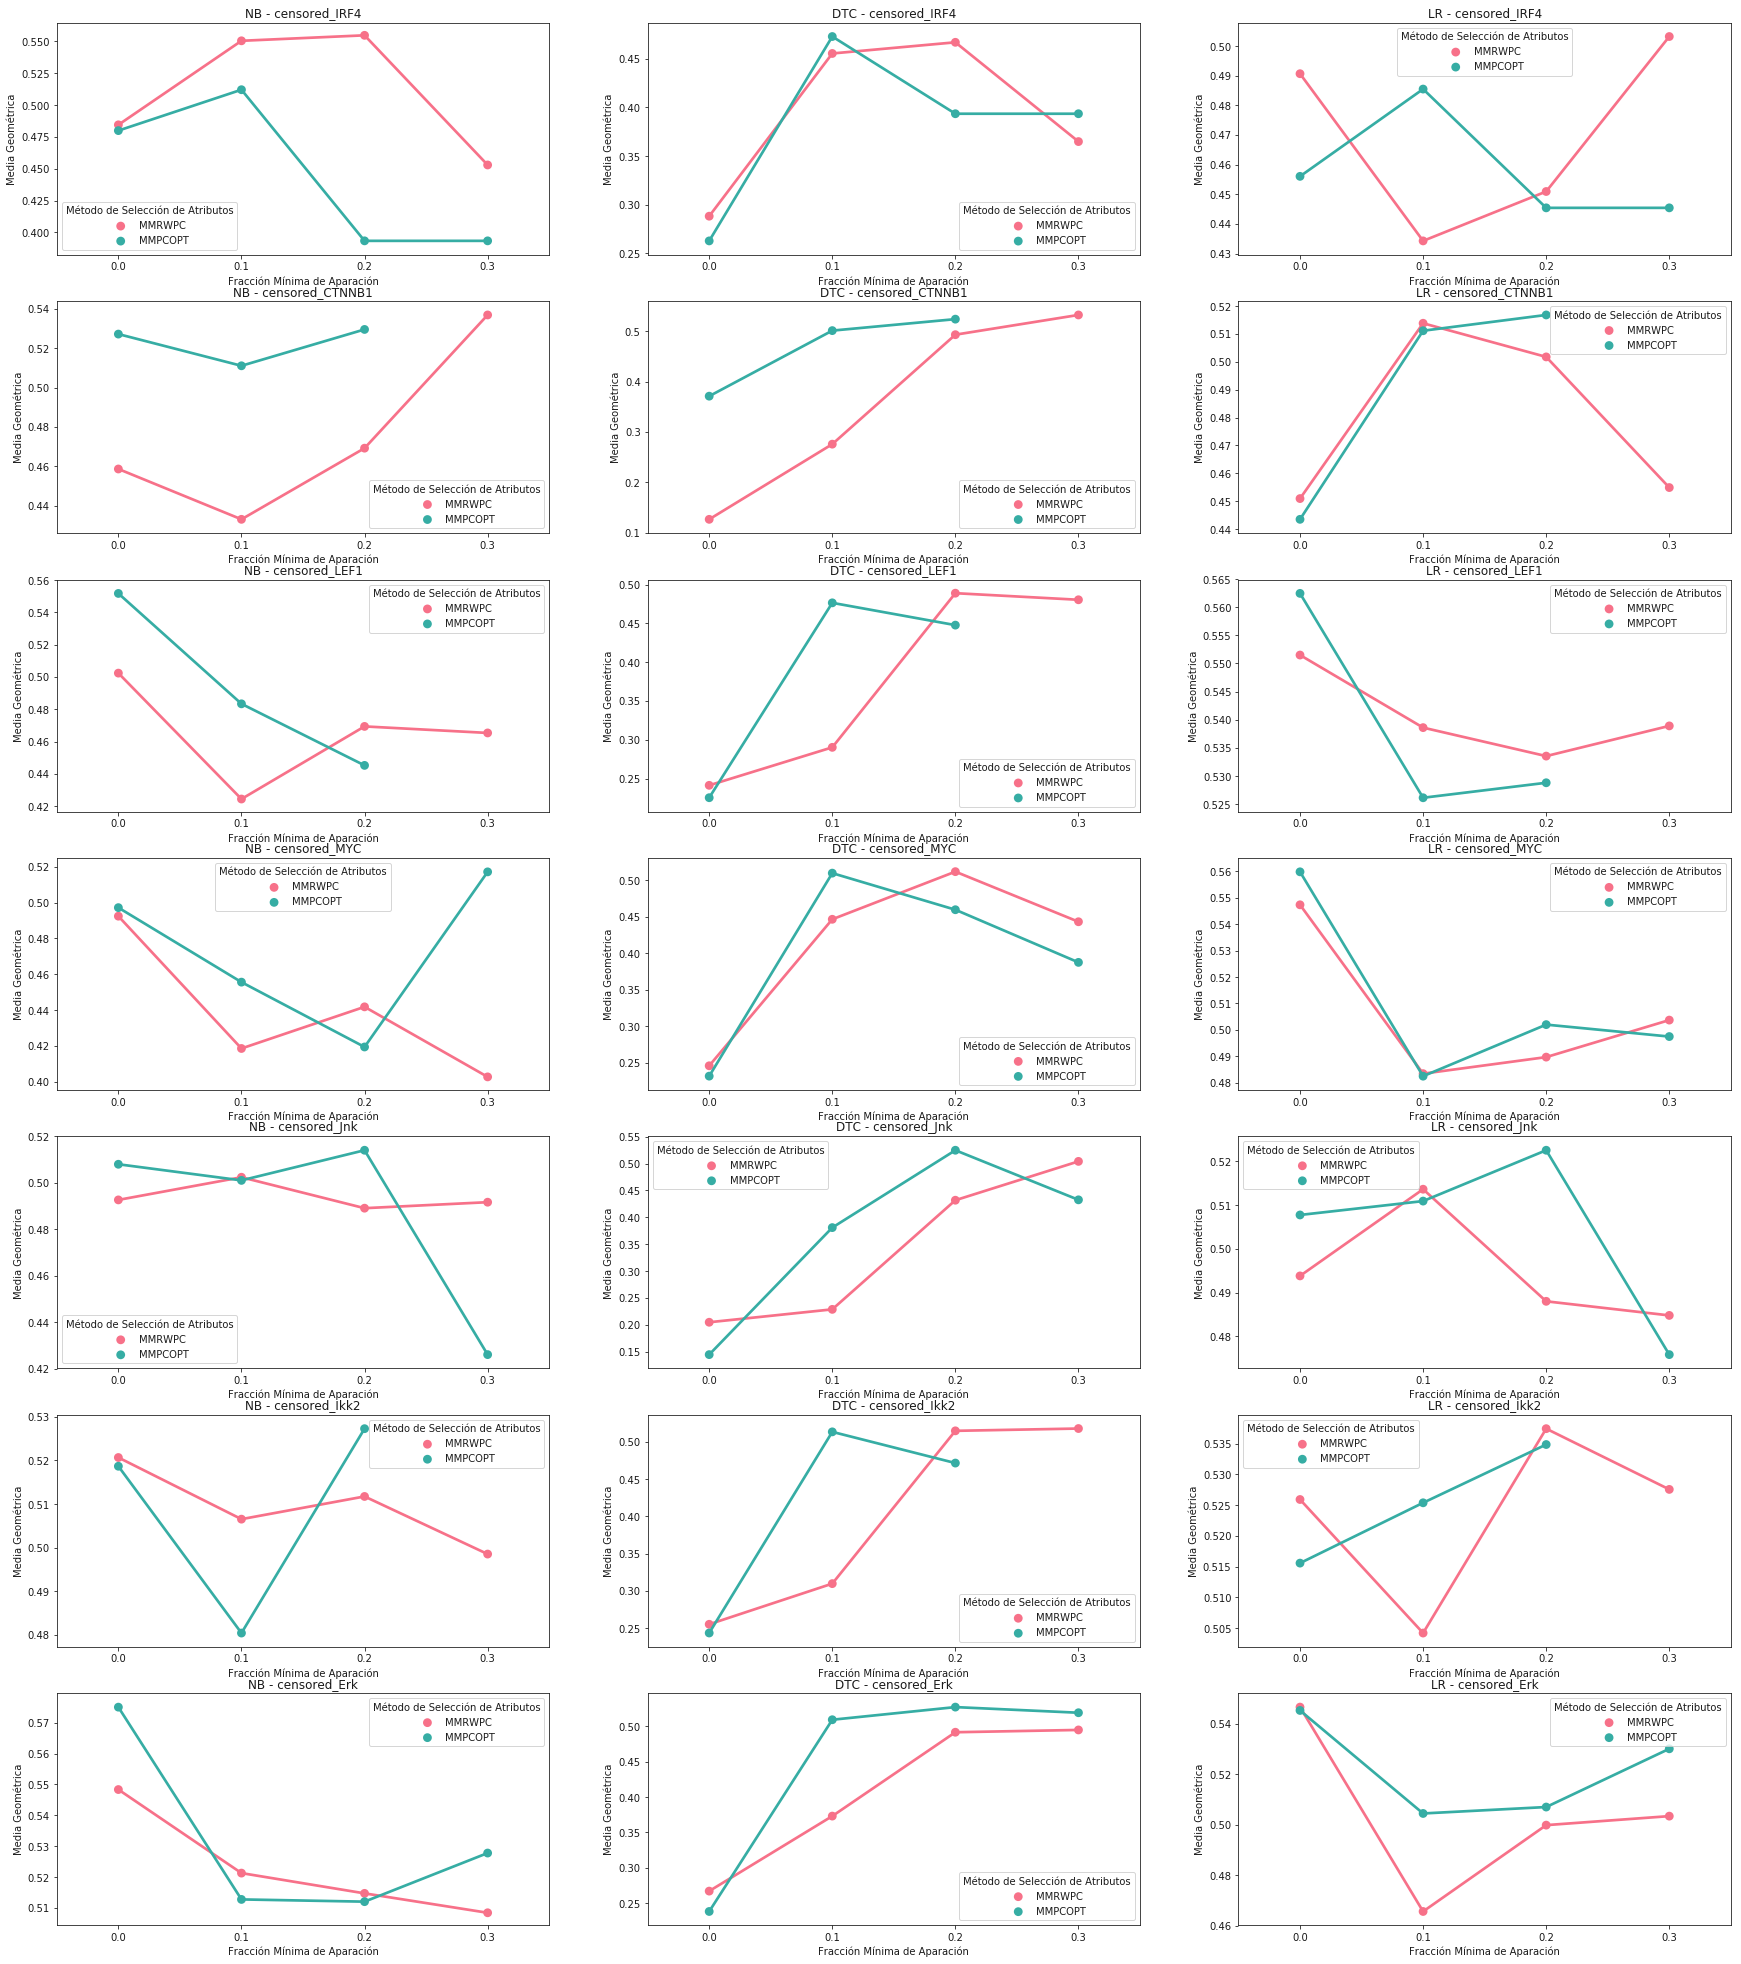

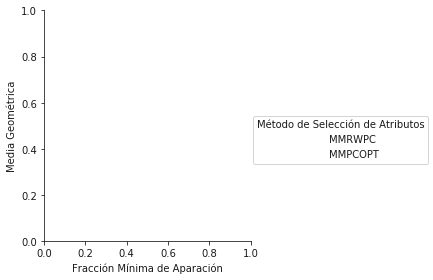

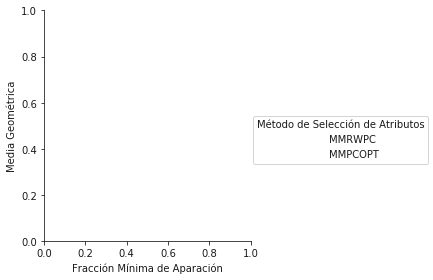

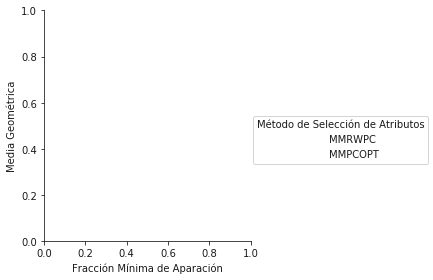

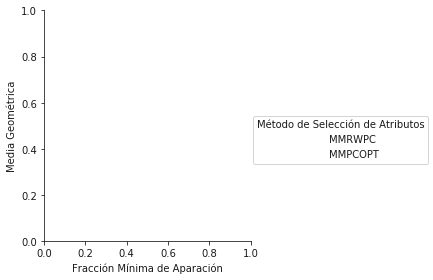

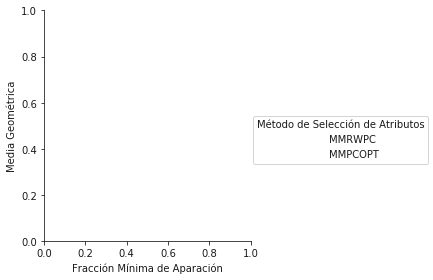

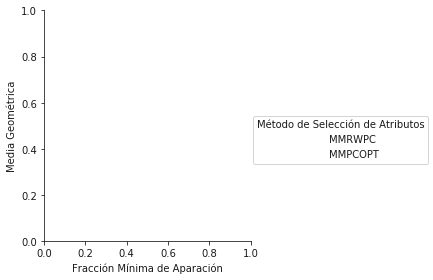

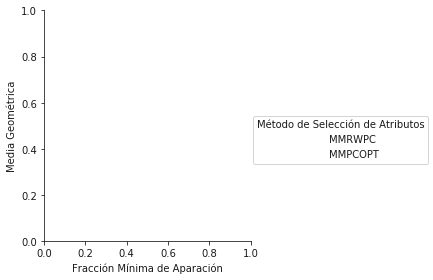

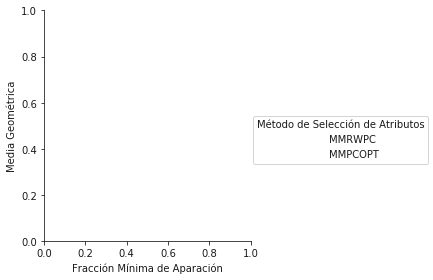

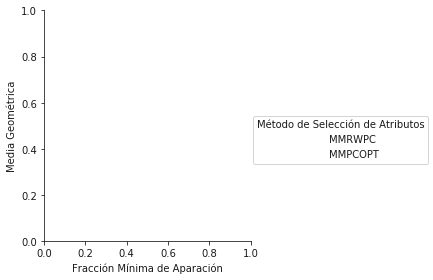

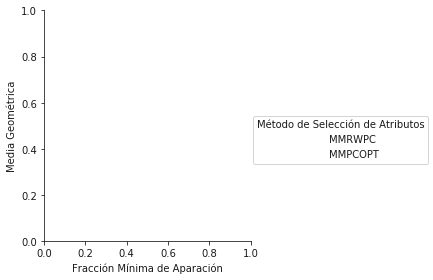

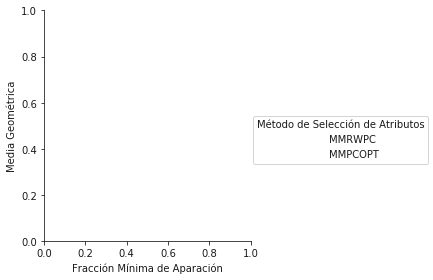

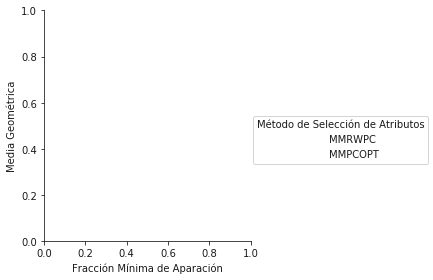

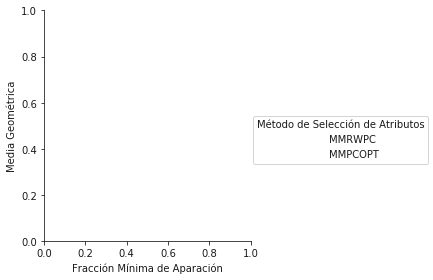

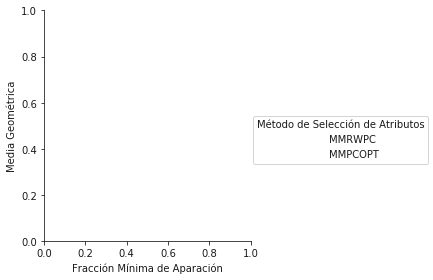

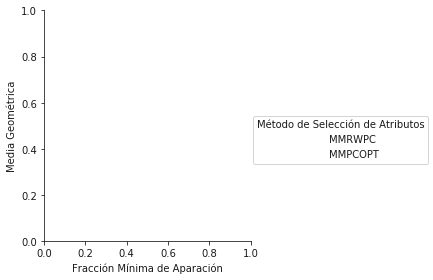

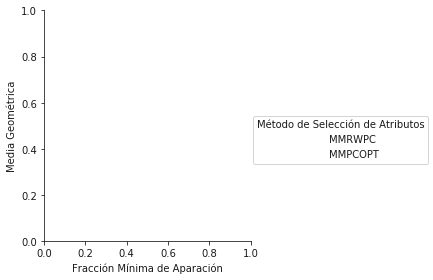

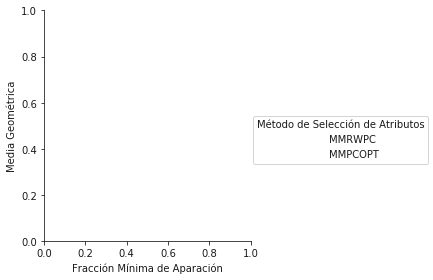

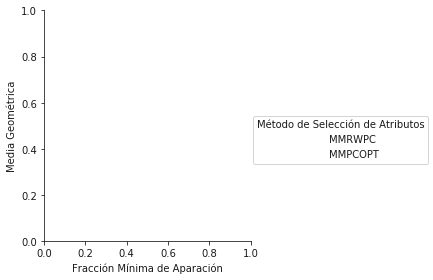

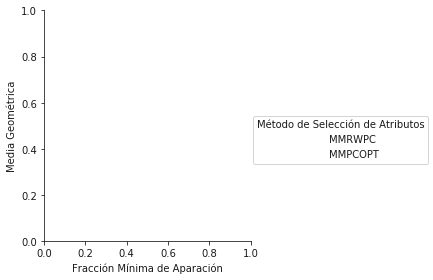

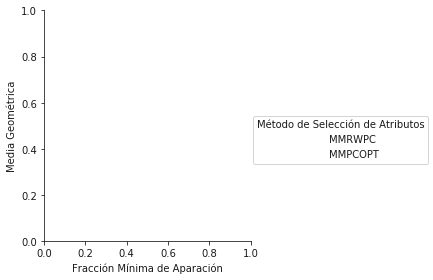

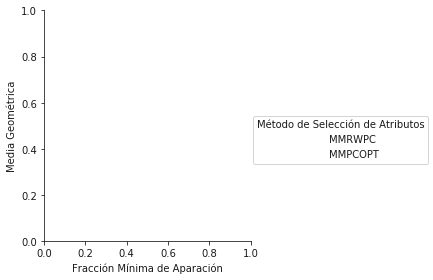

In [24]:
classificator_list = list(set(df["Clasificador"]))
origin_list = list(set(df["Origen"]))

#f, axes = plt.subplots(len(classificator_list), len(origin_list))
f, axes = plt.subplots(len(origin_list),len(classificator_list),figsize=(30,35))
for i in range(0,len(classificator_list)):
    for j in range(0,len(origin_list)):        
        # Draw a pointplot to show pulse as a function of three categorical factors
        sns.set_color_codes("pastel")
        #g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
        g = sns.factorplot(x="Fracción Mínima de Aparación",y="GMedia", hue="Método de Selección de Atributos",
                           data=aga_df.query('Clasificador == "'+classificator_list[i]+'" and Origen=="'+origin_list[j]+'"'), palette="husl", 
                            alpha=0.5, ax=axes[j,i])
        # g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
        # g.map(plt.scatter, "Node name", "Distance", alpha=.5)
        #g.set_yticklabels(np.arange(0,2,0.15))
        #g.set_xticklabels(rotation=90)
        #g.add_legend()
        axes[j,i].title.set_text(classificator_list[i]+" - "+origin_list[j])

In [32]:
results_save_folder = 'expanded_results/'
fourth_results_df = pd.DataFrame(columns=["SelectorAtributos","Clasificador","Top","GMedia","Origen"])
for directory in os.listdir(main_directory):
    if '.pickle' in directory or 'censored' not in directory or '.csv' in directory:
        continue
    print(directory)
    file_pre = main_directory+results_save_folder+directory
    for i in range(0,100):
        print(file_pre+'_sr_p'+str(i)+'.bz2')
        with bz2.open(file_pre+'_sr_p'+str(i)+'.bz2','rb',9) as f:
            s_data = pickle.load(f)
        print(i)
        for key in (list(s_data.keys())):
            print(key)
            for s_key in list(s_data[key].keys()):
                for t_key in list(s_data[key][s_key].keys()):
                    fourth_results_df = fourth_results_df.append({
                        "SelectorAtributos":key,
                        "Clasificador":s_key,
                        "Top":t_key,
                        "GMedia":s_data[key][s_key][t_key]['g-mean'],
                        "Origen":directory,
                    }, ignore_index=True)

censored_Jnk
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p0.bz2
0
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p1.bz2
1
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p2.bz2
2
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p3.bz2
3
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p4.bz2
4
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p5.bz2
5
MI
TTEST_ind
TTEST_rel
M

48
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p49.bz2
49
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p50.bz2
50
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p51.bz2
51
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p52.bz2
52
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p53.bz2
53
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_J

97
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p98.bz2
98
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Jnk_sr_p99.bz2
99
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
censored_Ikk2
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p0.bz2
0
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p1.bz2
1
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p2.bz2
2
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results

46
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p47.bz2
47
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p48.bz2
48
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p49.bz2
49
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p50.bz2
50
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p51.bz2
51
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censo

95
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p96.bz2
96
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p97.bz2
97
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p98.bz2
98
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Ikk2_sr_p99.bz2
99
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
censored_LEF1
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p0.bz2
0
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_r

44
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p45.bz2
45
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p46.bz2
46
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p47.bz2
47
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p48.bz2
48
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p49.bz2
49
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censo

93
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p94.bz2
94
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p95.bz2
95
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p96.bz2
96
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p97.bz2
97
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_LEF1_sr_p98.bz2
98
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censo

42
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p43.bz2
43
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p44.bz2
44
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p45.bz2
45
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p46.bz2
46
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p47.bz2
47
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censo

91
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p92.bz2
92
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p93.bz2
93
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p94.bz2
94
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p95.bz2
95
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_IRF4_sr_p96.bz2
96
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censo

40
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p41.bz2
41
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p42.bz2
42
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p43.bz2
43
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p44.bz2
44
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p45.bz2
45
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_M

89
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p90.bz2
90
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p91.bz2
91
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p92.bz2
92
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p93.bz2
93
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_MYC_sr_p94.bz2
94
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_M

38
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p39.bz2
39
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p40.bz2
40
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p41.bz2
41
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p42.bz2
42
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p43.bz2
43
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_E

87
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p88.bz2
88
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p89.bz2
89
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p90.bz2
90
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p91.bz2
91
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_Erk_sr_p92.bz2
92
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_E

35
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p36.bz2
36
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p37.bz2
37
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p38.bz2
38
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p39.bz2
39
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p40.bz2
40
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_res

83
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p84.bz2
84
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p85.bz2
85
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p86.bz2
86
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p87.bz2
87
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_results/censored_CTNNB1_sr_p88.bz2
88
MI
TTEST_ind
TTEST_rel
MMRWPC
MMPC_opt
/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/expanded_res

/home/a20114261/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


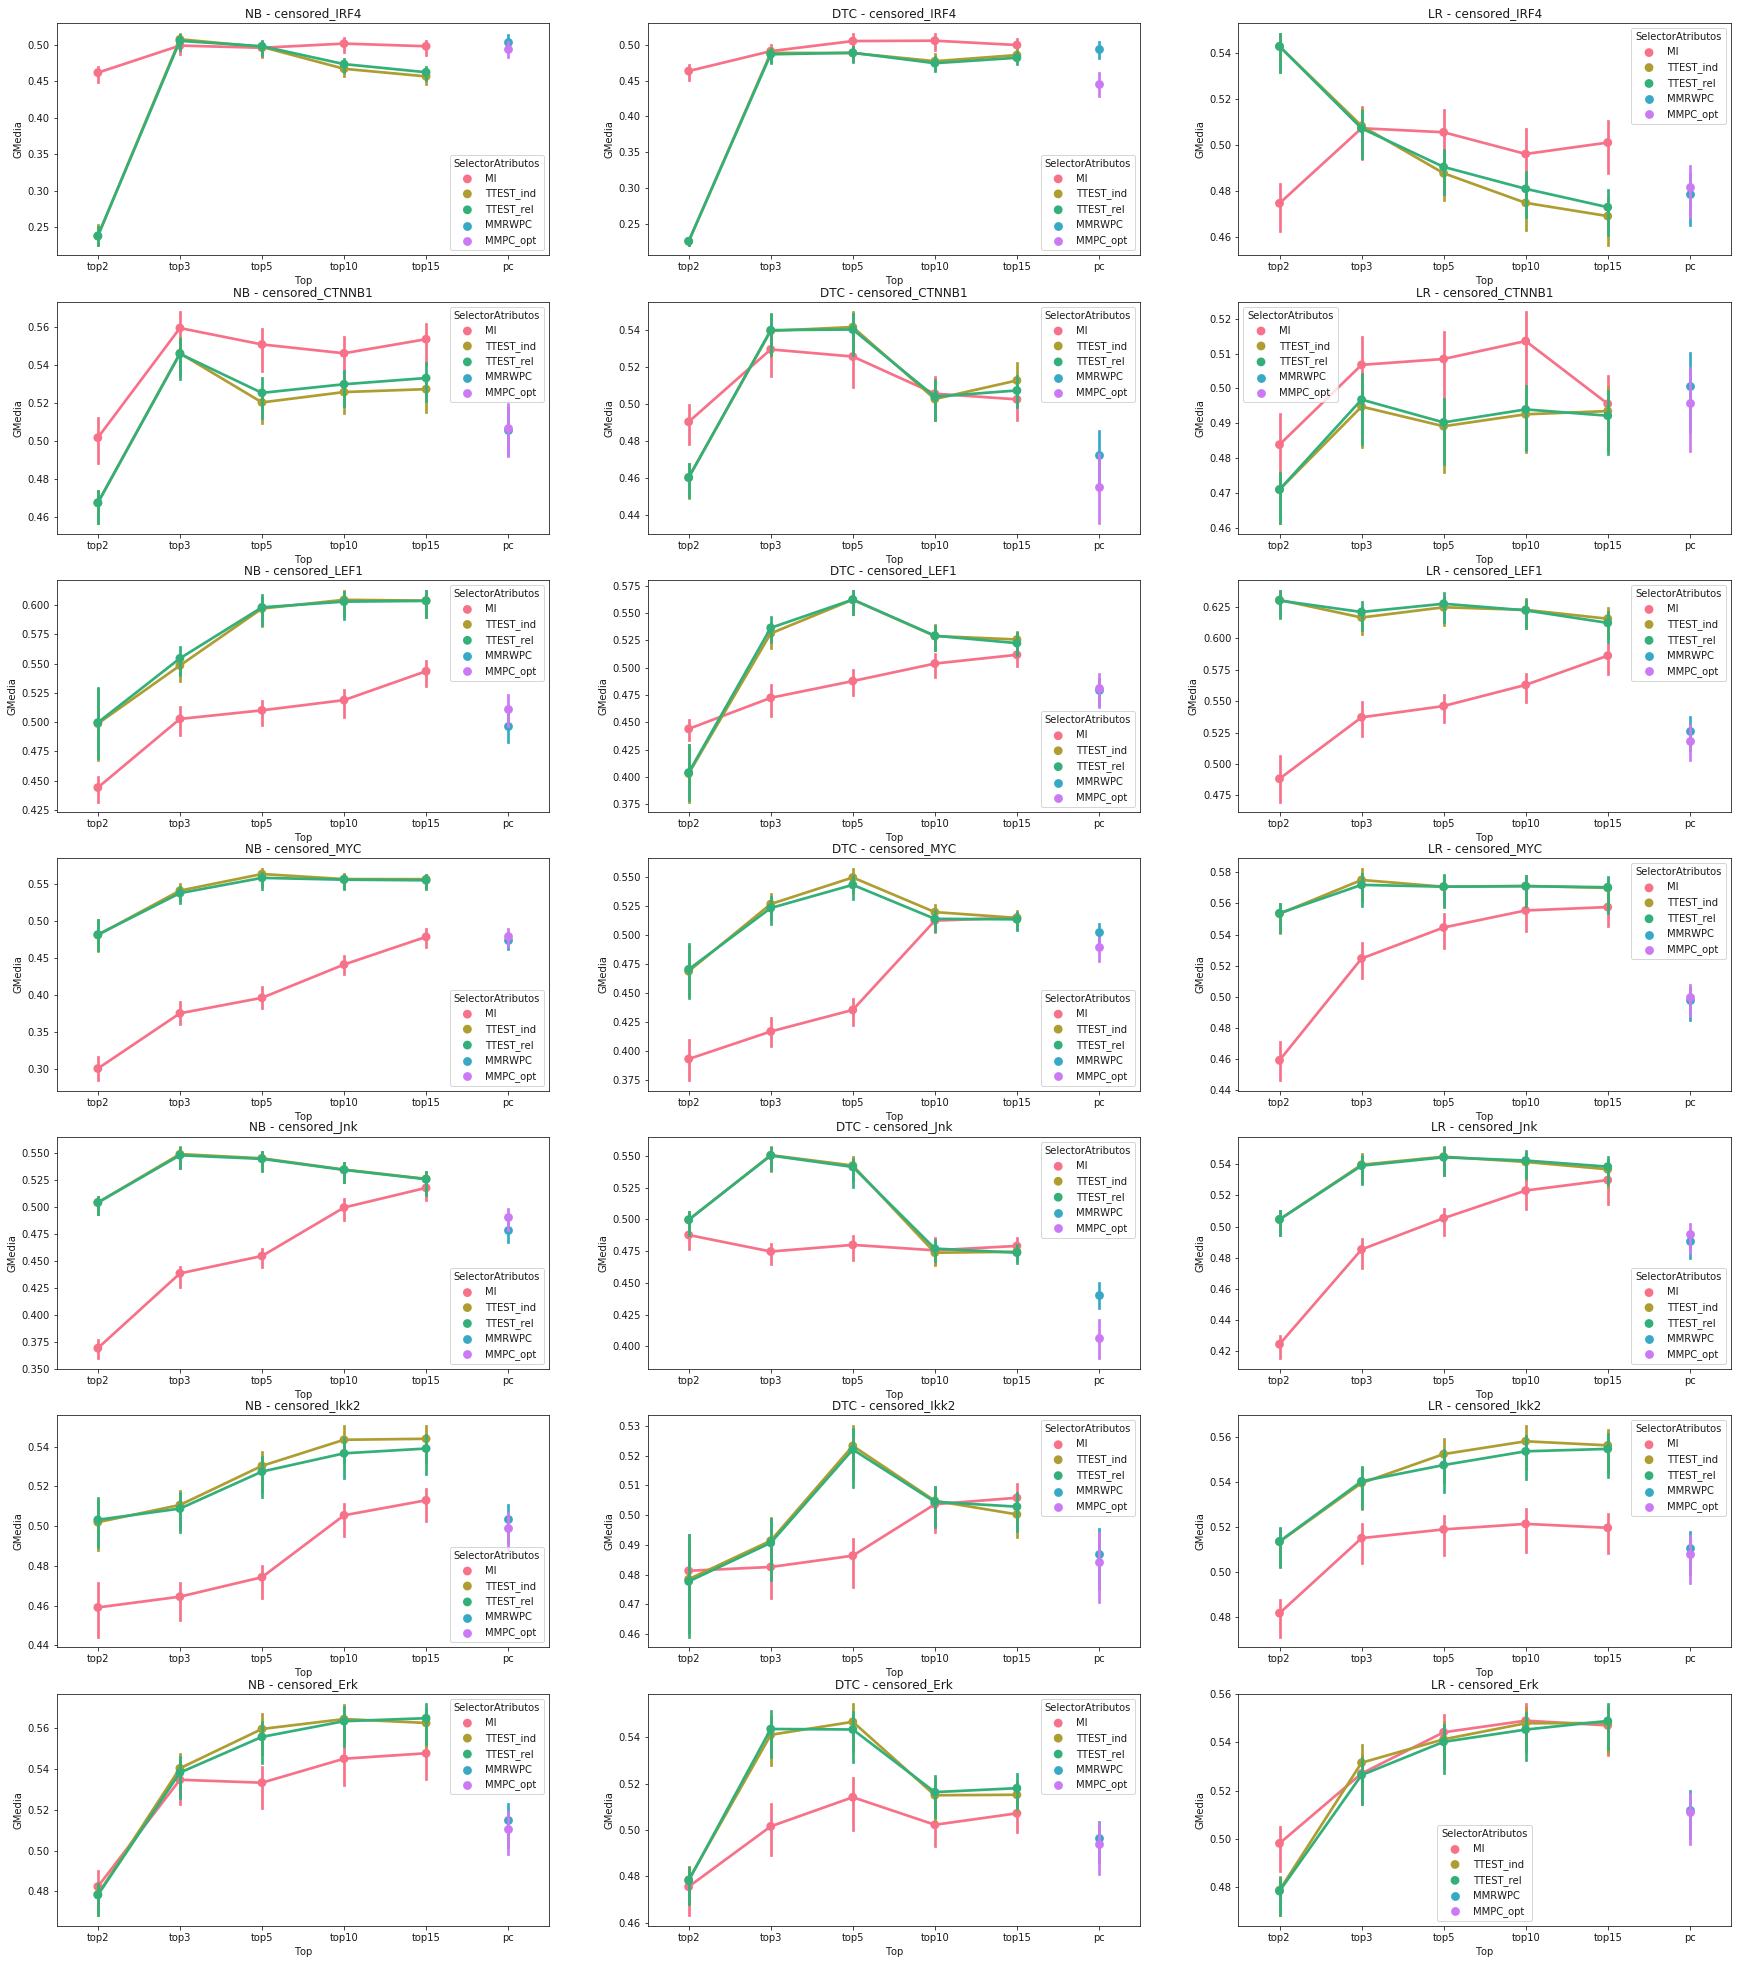

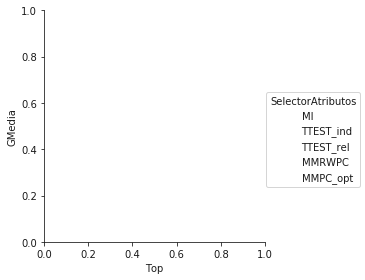

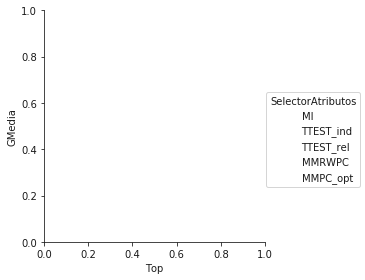

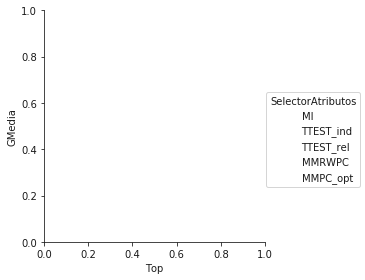

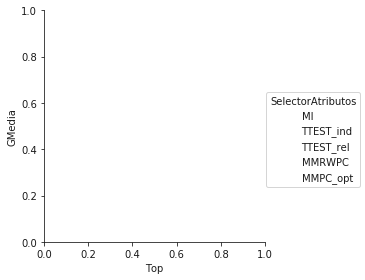

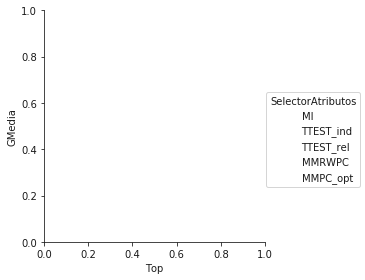

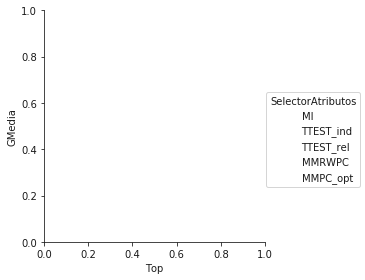

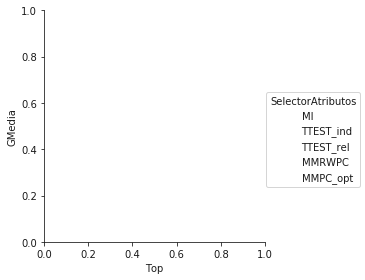

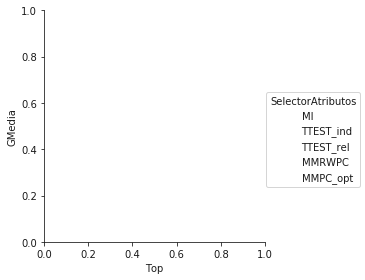

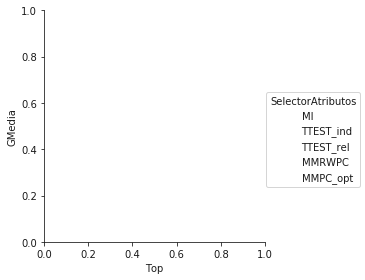

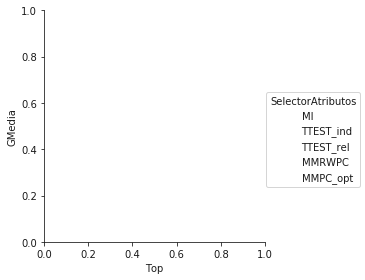

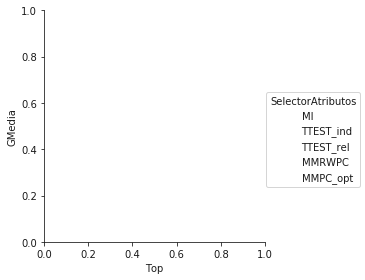

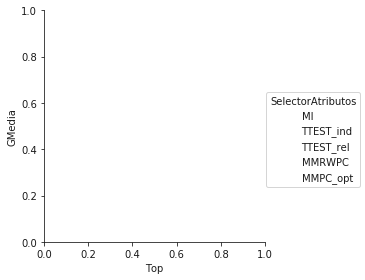

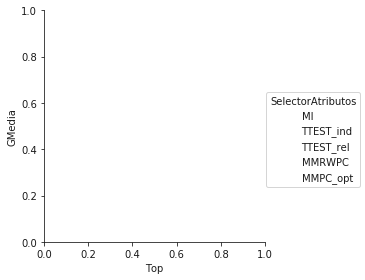

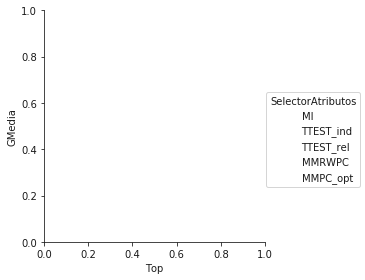

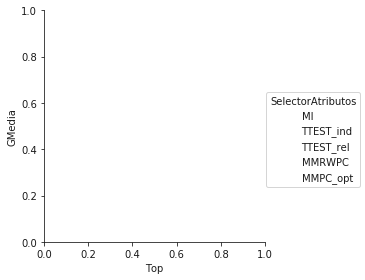

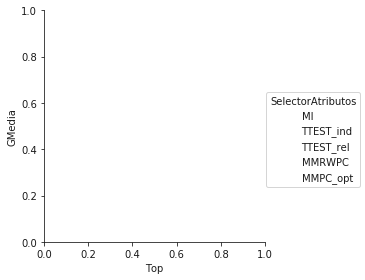

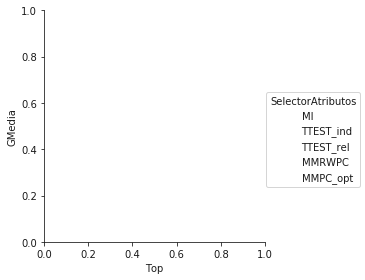

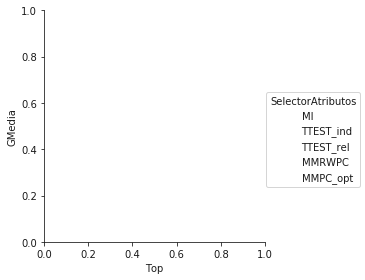

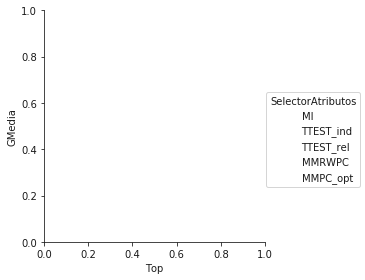

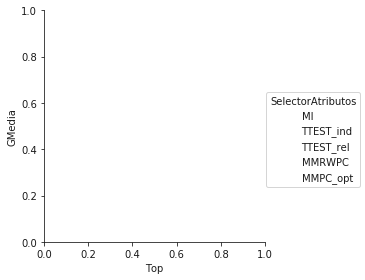

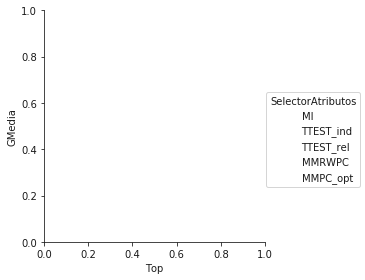

In [45]:
classificator_list = list(set(fourth_results_df["Clasificador"]))
origin_list = list(set(fourth_results_df["Origen"]))
f, axes = plt.subplots(len(origin_list),len(classificator_list), figsize=(30,35))
for i in range(0,len(classificator_list)):
    for j in range(0,len(origin_list)):        
        # Draw a pointplot to show pulse as a function of three categorical factors
        sns.set_color_codes("pastel")
        #g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
        g = sns.factorplot(x="Top",y="GMedia",hue='SelectorAtributos', 
                           data=fourth_results_df.query('Clasificador == "'+classificator_list[i]+'" and Origen=="'+origin_list[j]+'"'), palette="husl", 
                            alpha=0.5, ax=axes[j,i])
        # g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
        # g.map(plt.scatter, "Node name", "Distance", alpha=.5)
        #g.set_yticklabels(np.arange(0,2,0.15))
        #g.set_xticklabels(rotation=90)
        #g.add_legend()
        axes[j,i].title.set_text(classificator_list[i]+" - "+origin_list[j])

In [47]:
fourth_results_df.query('GMedia>0.60 and SelectorAtributos == "TTEST_rel"')

,SelectorAtributos,Clasificador,Top,GMedia,Origen
10230,TTEST_rel,NB,top2,0.638041,censored_LEF1
10233,TTEST_rel,NB,top10,0.645826,censored_LEF1
10234,TTEST_rel,NB,top15,0.633039,censored_LEF1
10240,TTEST_rel,LR,top2,0.638041,censored_LEF1
10241,TTEST_rel,LR,top3,0.621269,censored_LEF1
10242,TTEST_rel,LR,top5,0.652427,censored_LEF1
10243,TTEST_rel,LR,top10,0.625604,censored_LEF1
10244,TTEST_rel,LR,top15,0.610330,censored_LEF1
10282,TTEST_rel,NB,top3,0.617466,censored_LEF1
10283,TTEST_rel,NB,top5,0.605081,censored_LEF1
